In [95]:
#imports
import pickle
import pandas as pd
import numpy as np


In [ ]:
#load apple_df_ML.pkl
apple_df_ML = pickle.load(open('apple_df_ML.pkl', 'rb'))


In [102]:
X = apple_df_ML.drop('gain', axis=1).values
y = apple_df_ML['gain'].values
X

array([[178.235733, 178.331486, 178.289889, ..., 180.895859, 180.809004,
        180.69785 ],
       [181.904974, 181.859539, 181.845449, ..., 181.90672 , 181.835772,
        181.825168],
       [179.322448, 179.339692, 179.324874, ..., 178.618207, 178.662931,
        178.611732],
       ...,
       [141.985858, 142.114042, 142.227377, ..., 138.915147, 138.994524,
        138.938381],
       [137.599456, 137.384981, 137.338305, ..., 139.948746, 139.987529,
        139.921587],
       [137.627544, 137.508483, 137.48028 , ..., 136.956956, 136.90308 ,
        136.792118]])

In [103]:
# import the necessary modules
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1204)

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
scaler = MinMaxScaler()

In [107]:
scaler.fit(X_train)

MinMaxScaler()

In [108]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
!TF_ENABLE_ONEDNN_OPTS=0
!CUDA_VISIBLE_DEVICES=0
!TF_ENABLE_ONEDNN_OPTS=0

In [109]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [119]:
model = Sequential()

model.add(Dense(units=1000, activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(units=500, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=250, activation='relu'))
model.add(Dropout(0.1))

#model.add(Dense(units=125, activation='relu'))

#model.add(Dense(units=50, activation='relu'))

#model.add(Dense(units=25, activation='relu'))
#model.add(Dropout(0.1))

#model.add(Dense(units=10, activation='relu'))
#model.add(Dropout(0.1))

#model.add(Dense(units=4, activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(units=1, activation='sigmoid'))
model.add(Dropout(0.1))

#binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam')


In [130]:
#train the model
model.fit(x=X_train, y=y_train, epochs=30, batch_size=256, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
1/1 [==============================] - 0s 44ms/step - loss: 1.3782 - val_loss: 0.7495
Epoch 2/30
1/1 [==============================] - 0s 24ms/step - loss: 1.1751 - val_loss: 0.7575
Epoch 3/30
1/1 [==============================] - 0s 24ms/step - loss: 1.3248 - val_loss: 0.6887
Epoch 4/30
1/1 [==============================] - 0s 24ms/step - loss: 1.1930 - val_loss: 0.6711
Epoch 5/30
1/1 [==============================] - 0s 24ms/step - loss: 1.3231 - val_loss: 0.7519
Epoch 6/30
1/1 [==============================] - 0s 24ms/step - loss: 1.5740 - val_loss: 0.6662
Epoch 7/30
1/1 [==============================] - 0s 25ms/step - loss: 0.8708 - val_loss: 0.6689
Epoch 8/30
1/1 [==============================] - 0s 24ms/step - loss: 1.2946 - val_loss: 1.0833
Epoch 9/30
1/1 [==============================] - 0s 24ms/step - loss: 1.6625 - val_loss: 1.1564
Epoch 10/30
1/1 [==============================] - 0s 23ms/step - loss: 2.4379 - val_loss: 1.0065
Epoch 11/30
1/1 [============

<AxesSubplot:>

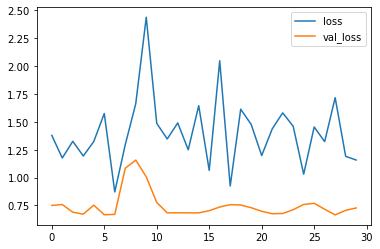

In [131]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [132]:
from sklearn.metrics import confusion_matrix, classification_report

In [135]:
# if model.predict(X_test) > 0.44 then 1 else 0:
predictions = model.predict(X_test)
predictions[predictions > predictions.mean()] = 1
predictions[predictions <= predictions.mean()] = 0
predictions

1/1 [==============================] - 0s 16ms/step


array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [136]:
print(classification_report(y_test, predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.69      0.60      0.64        15

    accuracy                           0.63        27
   macro avg       0.63      0.63      0.63        27
weighted avg       0.64      0.63      0.63        27



In [137]:
confusion_matrix(y_test, predictions)

array([[8, 4],
       [6, 9]])